# Esercizio 1

Il peso corporeo e la pressione sistolica del sangue di 26 individui maschi selezionati in modo
casuale nella fascia d’età che va da 25 a 30 anni sono mostrati in tabella. Assumiamo che il
peso e la pressione sanguigna siano normalmente distribuiti.

1. Si determini la retta di regressione.
2. Si calcolino gli intervalli di confidenza per i coefficienti di regressione.
3. Si testi la significatività della regressione usando α = 0.05.
4. Si calcoli il coefficiente di determinazione.

![Retta](img/regressione1.png)


In [349]:
import numpy as np

DATA = np.loadtxt("DATA_reg_lin.dat")
x = DATA[:, 1]  # Peso corporeo
y = DATA[:, 2]  # Pressione sistolica

# Calcolo dei coefficienti di regressione della retta y = b_0 + b_1*x

x_bar, y_bar = np.mean(x), np.mean(y)
n = x.size

sig_xy = np.sum((x - x_bar) * (y - y_bar)) / n
sig_x_2 = np.sum((x - x_bar) ** 2) / n

b_0 = y_bar - sig_xy / sig_x_2 * x_bar
b_1 = sig_xy / sig_x_2

print("Coefficienti di regressione: ", b_0, b_1)

Coefficienti di regressione:  69.10437279118659 0.41941520291569645


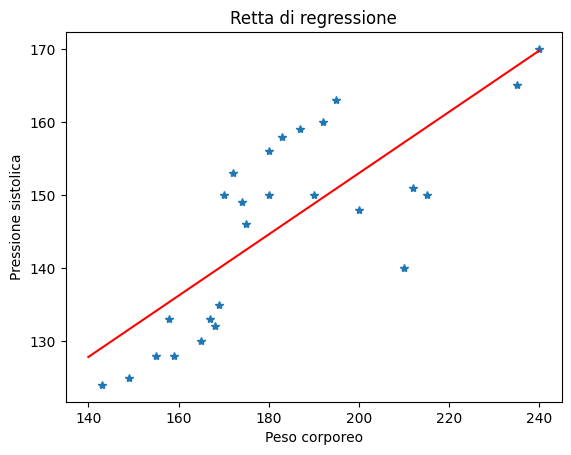

In [350]:
import matplotlib.pyplot as plt

assex = np.linspace(140, 240, 1000)
assey = b_0 + b_1 * assex

plt.plot(x, y, "*")
plt.plot(assex, assey, color="red")
plt.title("Retta di regressione")
plt.xlabel("Peso corporeo")
plt.ylabel("Pressione sistolica")
plt.show()

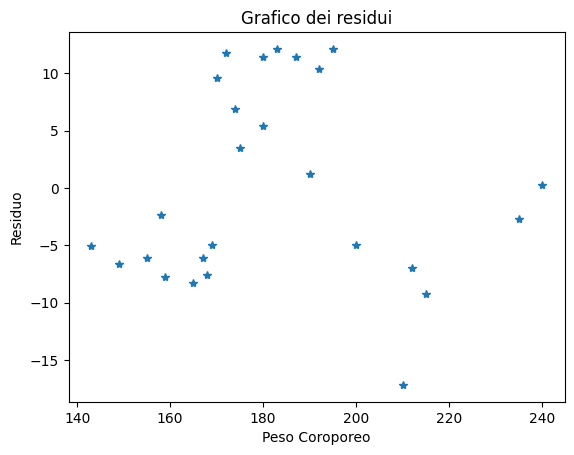

In [351]:
# Calcolo dei residui

y_hat = b_0 + b_1 * x
r = y - y_hat

plt.plot(x, r, "*")
plt.title("Grafico dei residui")
plt.xlabel("Peso Coroporeo")
plt.ylabel("Residuo")
plt.show()

In [352]:
# Calcolo degli intervalli di confidenza
from scipy.stats import t

s2 = np.sum(r**2) / (n - 2)
alpha = 0.05

T = t.ppf(1 - alpha / 2, n - 2)
s = np.sqrt(s2)
sig_x = np.sqrt(sig_x_2)

b_0_sx = b_0 - s * np.sqrt(1 / n + x_bar**2 / (n * sig_x_2)) * T
b_0_dx = b_0 + s * np.sqrt(1 / n + x_bar**2 / (n * sig_x_2)) * T

b_1_sx = b_1 - s / (sig_x * np.sqrt(n)) * T
b_1_dx = b_1 + s / (sig_x * np.sqrt(n)) * T

print("Intervallo di confidenza di b_0: [{},{}]".format(b_0_sx, b_0_dx))
print("Intervallo di confidenza di b_1: [{},{}]".format(b_1_sx, b_1_dx))

Intervallo di confidenza di b_0: [42.45917560573429,95.7495699766389]
Intervallo di confidenza di b_1: [0.27462811448021235,0.5642022913511806]


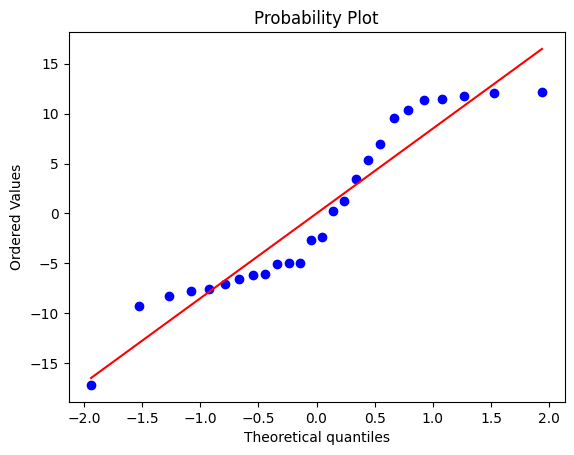

In [353]:
from scipy.stats import probplot
from scipy.stats import norm

probplot(r, dist=norm, plot=plt)
plt.show()

In [354]:
# Test di significatività

alpha = 0.05

T1 = np.abs(np.sqrt(n) * (b_1 / s) * sig_x)
t = t.ppf(1 - alpha / 2, n - 2)

print("T1: |{}|".format(T1))
print("t: ", t)
print("T1 >= t: Si rigetta l'ipotesi")

T1: |5.978643837487954|
t:  2.0638985616280205
T1 >= t: Si rigetta l'ipotesi


In [355]:
# Calcolo del coefficiente di determinazione

sig_y_2 = np.sum((y - y_bar) ** 2) / n
R2 = sig_xy**2 / (sig_x_2 * sig_y_2)

print("Coefficiente di determinazione: ", R2)

Coefficiente di determinazione:  0.5982872450148403


# Esercizio 2

L’ossigeno consumato da una persona che cammina è funzione della sua velocità.
La seguente tabella riporta il volume di ossigeno consumato a varie velocità di cammino.

![retta](img/regressione2.png)

- Ipotizzando una relazione lineare, scrivere l’equazione della retta di regressione.
- Si testi la significatività della regressione usando α = 0.05.


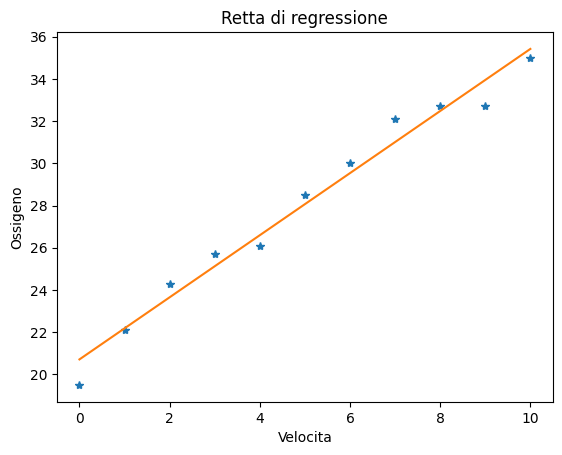

In [356]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(0, 11)
Y = np.array([19.5, 22.1, 24.3, 25.7, 26.1, 28.5, 30.0, 32.1, 32.7, 32.7, 35.0])

x_bar = np.mean(X)
y_bar = np.mean(Y)

n = X.size

sig_xy = np.sum((X - x_bar) * (Y - y_bar)) / n
sig_2_x = np.sum((X - x_bar) ** 2) / n

b0 = y_bar - ((sig_xy) / (sig_2_x)) * x_bar
b1 = sig_xy / sig_2_x

assex = np.linspace(0, 10, 100)
assey = b0 + b1 * assex

plt.plot(X, Y, "*")
plt.plot(assex, assey)
plt.title("Retta di regressione")
plt.xlabel("Velocita")
plt.ylabel("Ossigeno")
plt.show()

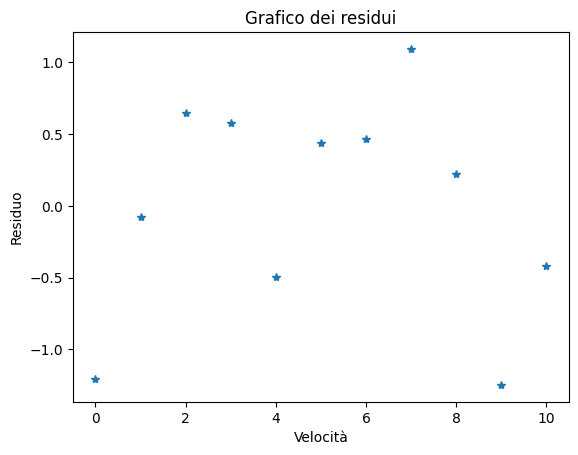

In [357]:
# Calcoliamo i residui
y_hat = b0 + b1 * X
r = Y - y_hat

plt.plot(X, r, "*")
plt.title("Grafico dei residui")
plt.xlabel("Velocità")
plt.ylabel("Residuo")
plt.show()
s2 = np.sum(r**2) / (n - 2)

In [358]:
# test di indipendenza
from scipy.stats import t

alpha = 0.05
s = np.sqrt(s2)
sig_x = np.sqrt(sig_2_x)

T1 = np.abs(np.sqrt(n) * (b1 / s) * sig_x)
t = t.ppf(1 - alpha / 2, n - 2)
print("T1: |{}|".format(T1))
print("t: ", t)
print("T1 >= t: Si rigetta l'ipotesi")

T1: |19.131004675087407|
t:  2.2621571627409915
T1 >= t: Si rigetta l'ipotesi


# Esercizio 3 
Consideriamo i dati di tabella. Formuliamo degli appropriati modelli di regressione.

.![tabella](img/regressione3.png)

In [359]:
import numpy as np

DATA = np.loadtxt("DATA_reg_lin_2.dat")
x= DATA[:,0] #x
y= DATA[:,1] #y


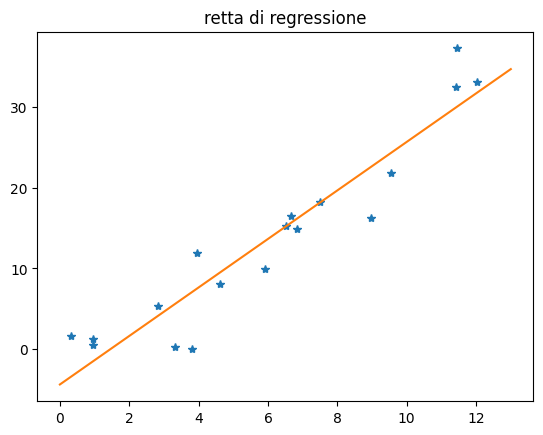

In [361]:
# Calcolo dei coefficienti di regressione y = b_0 + b_1 x
import matplotlib.pyplot as plt
n = x.size
x_bar = np.mean(x)
y_bar = np.mean(y)
sig_xy = np.sum((x-x_bar)*(y-y_bar))/n
sig_x_2 = np.sum((x-x_bar)**2.)/n

b_0 = y_bar - sig_xy/sig_x_2*x_bar
b_1 = sig_xy/sig_x_2

assex = np.linspace(0,13,100)
assey= b_0+b_1*assex
# Grafico non obbligatorio
plt.plot(x,y,"*")
plt.plot(assex,assey)
plt.title("retta di regressione")
plt.show()

In [362]:
# Calcolo dei coefficienti di regressione usando le formule
# della regressione lineare multipla

In [363]:
x1 = np.ones(n)
x2 = x
X = np.zeros((n,2))
X[:,0] = x1
X[:,1] = x2
display(X)

array([[ 1.  ,  0.32],
       [ 1.  ,  2.83],
       [ 1.  ,  3.94],
       [ 1.  ,  6.52],
       [ 1.  ,  7.51],
       [ 1.  , 11.43],
       [ 1.  ,  0.96],
       [ 1.  ,  3.32],
       [ 1.  ,  4.62],
       [ 1.  ,  6.65],
       [ 1.  ,  8.96],
       [ 1.  , 11.45],
       [ 1.  ,  0.96],
       [ 1.  ,  3.8 ],
       [ 1.  ,  5.91],
       [ 1.  ,  6.83],
       [ 1.  ,  9.56],
       [ 1.  , 12.02]])

In [364]:
import numpy as np
XX = np.linalg.pinv(X)
b = np.dot(XX,y)
display(b)
y_hat = np.dot(X,b)
display(y_hat)

array([-4.39133048,  3.01016775])

array([-3.42807679,  4.12744427,  7.46873047, 15.23496327, 18.21502935,
       30.01488694, -1.50156943,  5.60242646,  9.51564454, 15.62628508,
       22.57977259, 30.0750903 , -1.50156943,  7.04730699, 13.39876095,
       16.16811528, 24.38587324, 31.79088592])

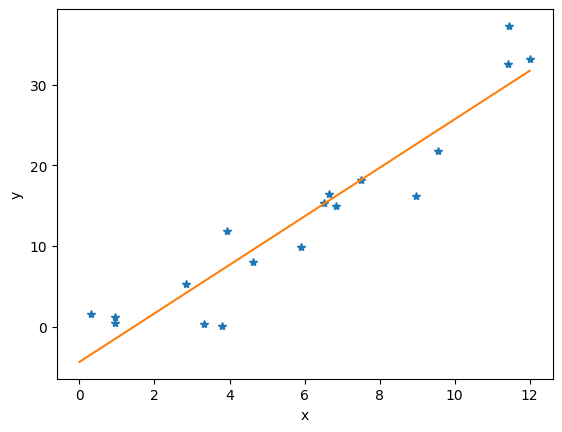

In [365]:
# Grafico
xx = np.linspace(0.,12.,100)
yy = b[0] + b[1]*xx

import matplotlib.pyplot as plt
plt.plot(x, y, '*')
plt.plot(xx, yy)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [366]:
R2 = np.sum((y_hat-y_bar)**2.) / np.sum((y-y_bar)**2.)
display(R2)

0.8905996203945858

In [367]:
# test di indipendenza 
# H0 : b1 = 0
# H1 : b1 <> 0

M = np.linalg.inv(np.dot(X.T,X))
m = M[1][1]
r = y-y_hat
s2 = np.sum(r**2.)/(n-2)
T1 = b[1]/(np.sqrt(s2*m))
display(T1)

from scipy.stats import t
alpha = 0.05
tt = t.ppf(1.-alpha/2.,n-2)
display(tt)

11.412790093360774

2.119905299221011

In [368]:
# Rigettiamo l'ipotesi nulla
# Pertanto vi è dipendenza di y dal predittore

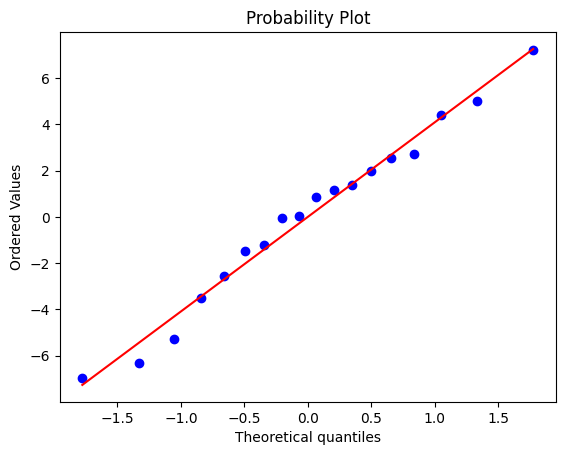

In [369]:
from scipy.stats import probplot
from scipy.stats import norm
fig, ax = plt.subplots(1, 1)
probplot(r, dist=norm, plot=ax)
plt.show()

In [370]:
# Adottiamo un modello quadratico
X2 = np.zeros((n,3))
X2[:,0] = x1
X2[:,1] = x2
X2[:,2] = x2**2.
display(X2)

array([[1.000000e+00, 3.200000e-01, 1.024000e-01],
       [1.000000e+00, 2.830000e+00, 8.008900e+00],
       [1.000000e+00, 3.940000e+00, 1.552360e+01],
       [1.000000e+00, 6.520000e+00, 4.251040e+01],
       [1.000000e+00, 7.510000e+00, 5.640010e+01],
       [1.000000e+00, 1.143000e+01, 1.306449e+02],
       [1.000000e+00, 9.600000e-01, 9.216000e-01],
       [1.000000e+00, 3.320000e+00, 1.102240e+01],
       [1.000000e+00, 4.620000e+00, 2.134440e+01],
       [1.000000e+00, 6.650000e+00, 4.422250e+01],
       [1.000000e+00, 8.960000e+00, 8.028160e+01],
       [1.000000e+00, 1.145000e+01, 1.311025e+02],
       [1.000000e+00, 9.600000e-01, 9.216000e-01],
       [1.000000e+00, 3.800000e+00, 1.444000e+01],
       [1.000000e+00, 5.910000e+00, 3.492810e+01],
       [1.000000e+00, 6.830000e+00, 4.664890e+01],
       [1.000000e+00, 9.560000e+00, 9.139360e+01],
       [1.000000e+00, 1.202000e+01, 1.444804e+02]])

In [371]:
XX2 = np.linalg.pinv(X2)
b2 = np.dot(XX2,y)
display(b2)
y_hat_2 = np.dot(X2,b2)
display(y_hat_2)

array([0.13714061, 0.83177463, 0.17471849])

array([ 0.42119966,  3.8903657 ,  6.12659254, 12.98766393, 16.23790817,
       32.47040378,  1.09666481,  4.82444942,  7.70920065, 13.39493015,
       21.61652091, 32.56699045,  1.09666481,  5.82081914, 11.15551343,
       13.96858652, 24.0570575 , 35.37846842])

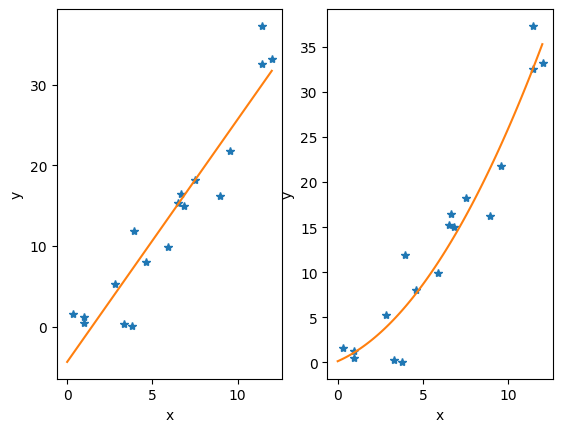

In [372]:
# Grafico
xx = np.linspace(0.,12.,100)
yy = b[0] + b[1]*xx
yy2 = b2[0] + b2[1]*xx + b2[2]*xx**2.

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, y, '*')
ax1.plot(xx, yy)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(x, y, '*')
ax2.plot(xx, yy2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
plt.show()

In [373]:
M2 = np.linalg.inv(np.dot(X2.T,X2))
m2 = M2[1][1]
m3 = M2[2][2]
r2 = y-y_hat_2
s2_2 = np.sum(r2**2.)/(n-3)


# test di indipendenza 
# H0 : b1 = 0
# H1 : b1 <> 0

T1_2 = b2[1]/(np.sqrt(s2_2*m2))
display(T1_2)

# test di indipendenza 
# H0 : b2 = 0
# H1 : b2 <> 0

T2_2 = b2[2]/(np.sqrt(s2_2*m3))
display(T2_2)

from scipy.stats import t
tt = t.ppf(1.-alpha/2.,n-3)
display(tt)

1.0028596601848998

2.7266250601819872

2.131449545559323

In [374]:
# Poiché T2_2 > tt si rigetta l'ipotesi nulla
# evidenziando una notevole dipendenza dal termine quadratico

In [376]:
R2 = np.sum((y_hat_2-y_bar)**2.) / np.sum((y-y_bar)**2.)
display(R2)

0.9268534244836734

In [ ]:
# Osserviamo che il coefficiente di determinazione è maggiore rispetto
# a quello del modello lineare suggerendo una migliore adeguatezza
# del modello quadratico